# Serelizing the test data
This code will take the images on the "test" folder inside datavase_raw, and make a file containig its values into a file. The test data consists of live images of the person's face (different from the ones used in the trainnig stage), and the spoofed ones ("real" spoofed images, not the ones artificially generated).
> See "serilize_train_data" to better understaing of the directory organization

In [1]:
import os
import pickle 
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
person = "001"
test_folder = os.path.join("database_raw","test")
tags = ["Live", "Spoof"]
data_folder = "database_serialized"

In [3]:
def get_data_person(person_folder):
    test_data = []
    count = 0
    for tag in tags:
        files_folder = os.path.join(person_folder,tag)
        files = os.listdir(files_folder)
        for file in files:
            try:
                img = cv2.imread(os.path.join(files_folder,file))
                test_data.append([img,count])

            except Exception:
                print(f"Fail to load {file}")
        count += 1 
    return test_data

In [4]:
people = os.listdir(test_folder)
for person in people:
    test_data = get_data_person(os.path.join(test_folder,person))
    X = []
    y = []   
    random.shuffle(test_data)
    for features, label in test_data:
        X.append(features)
        y.append(label)

    img_size = len(X[0]) 
    X = np.array(X).reshape(-1,img_size,img_size,3)
    X.shape

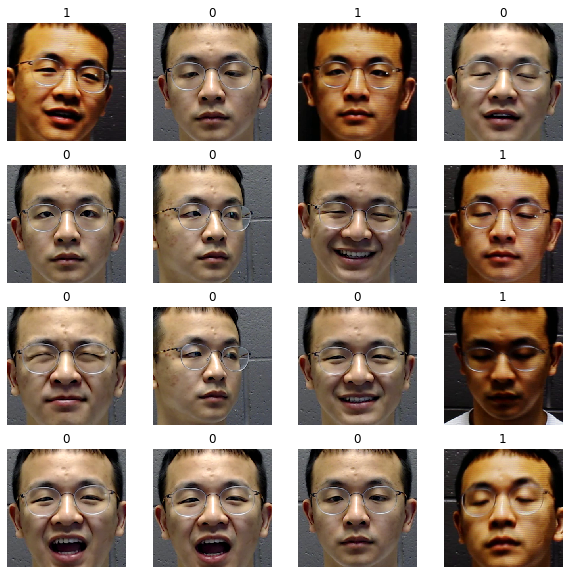

In [5]:
%matplotlib inline
# plot images to see if they are good and correctly labeled
plt.figure(figsize=(10,10))
nrows = 4
ncols = 4
start = 4
X_sample = X[start:start +nrows*ncols]
i = start
for img in X_sample:
    plt.subplot(nrows,ncols,i-start+1)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"{y[i]}")
    i += 1

In [6]:
# Save data into memory
pickle_out = open(os.path.join(data_folder,person,f"X{person}Test.pickle"),"wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out = open(os.path.join(data_folder,person,f"y{person}Test.pickle"),"wb")
pickle.dump(y,pickle_out)
pickle_out.close()